In [1]:
import tensorflow as tf
import numpy as np

#forecasters attributes
x = np.array([[0,0], [0,1], [1,0], [1,1]])
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [2]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [3]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [4]:
#Weights
w = {'oculta': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'),
    'saida': tf.Variable(tf.random_normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
type(w)

dict

In [7]:
type(w['oculta'])

tensorflow.python.ops.variables.RefVariable

In [8]:
w['oculta']

<tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32_ref>

In [9]:
w['saida']

<tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32_ref>

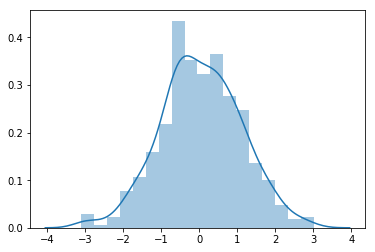

In [18]:
distribuicao = np.random.normal(size = 500)
#distribuicao
import seaborn as sns
%matplotlib inline
sns.distplot(distribuicao)

In [19]:
#Bias
b = {'oculta': tf.Variable(tf.random_normal([neuronios_oculta]), name = 'b_oculta'),
    'saida': tf.Variable(tf.random_normal([neuronios_saida]), name = 'b_saida')}

In [22]:
xph = tf.placeholder(tf.float32, [4, neuronios_entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [4, neuronios_saida], name = 'yph')

In [34]:
camada_oculta = tf.add(tf.matmul(xph, w['oculta']), b['oculta'])
camada_oculta_ativacao = tf.sigmoid(camada_oculta)
camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, w['saida']), b['saida'])
camada_saida_ativacao = tf.sigmoid(camada_saida)
erro = tf.losses.mean_squared_error(yph, camada_saida_ativacao)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.3).minimize(erro)

Instructions for updating:
Use tf.cast instead.


In [20]:
init = tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(w['oculta']))
    #print(sess.run(w['saida']))
    #print(sess.run(b['oculta']))
    #print('\n')
    #print(sess.run(b['saida']))
    #print(sess.run(camada_oculta, feed_dict = {xph: x}))
    #print(sess.run(camada_oculta_ativacao, feed_dict = {xph: x}))
    #print(sess.run(camada_saida, feed_dict = {xph: x}))
    #print(sess.run(camada_saida_ativacao, feed_dict = {xph: x}))
    for epocas in range(10000):
        erro_medio = 0
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: x, yph: y})
        if epocas % 200 == 0:
            #print(custo)
            erro_medio += custo / 4
            print(erro_medio)
    w_final, b_final = sess.run([w, b])

0.10504361987113953
0.060319021344184875
0.05671008676290512
0.04826522246003151
0.033487677574157715
0.019432757049798965
0.011416109278798103
0.007386988960206509
0.005221960134804249
0.0039421864785254
0.00312141259200871
0.002560175722464919
0.0021567498333752155
0.0018551001558080316
0.001622295705601573
0.001437935745343566
0.0012887802440673113
0.0011659187730401754
0.0010631605982780457
0.0009760811226442456
0.0009014409151859581
0.0008368237176910043
0.0007803860935382545
0.0007307082414627075
0.000686672399751842
0.0006473909597843885
0.0006121532642282546
0.0005803777021355927
0.0005515902303159237
0.0005253985291346908
0.0005014728521928191
0.0004795368586201221
0.00045935960952192545
0.00044074031757190824
0.0004235109081491828
0.00040752143831923604
0.0003926483914256096
0.00037877849536016583
0.0003658171044662595
0.00035367862437851727
0.0003422902664169669
0.0003315844223834574
0.00032150198239833117
0.00031199201475828886
0.00030300827347673476
0.00029450777219608426


In [39]:
w_final

{'oculta': array([[ 5.583498  ,  5.3123264 ,  0.3493446 ],
        [-5.1696205 , -5.7167377 ,  0.82937396]], dtype=float32),
 'saida': array([[ 8.075105 ],
        [-8.428207 ],
        [-2.1198668]], dtype=float32)}

In [40]:
b_final

{'oculta': array([ 2.653279 , -2.8580413,  0.7263764], dtype=float32),
 'saida': array([-2.1745892], dtype=float32)}

In [41]:
#Test
camada_oculta_teste = tf.add(tf.matmul(xph, w_final['oculta']), b_final['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, w_final['saida']), b_final['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [42]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_saida_ativacao_teste, feed_dict = {xph: x}))

[[0.9702028 ]
 [0.03478149]
 [0.03095761]
 [0.96723855]]
